# Installing Libraries

In [11]:
import os
import shutil
import random
from pathlib import Path
from typing import List

# Dataset Preparation

In [6]:
# 📦 Imports
import os
import shutil
import random
from pathlib import Path
from typing import List

# 📁 Dataset paths
dataset_dir = Path("Dataset")
images_dir = dataset_dir / "images"
annotations_dir = dataset_dir / "annotations"

# ✅ Step 1: Extract base filenames (no extension)
image_basenames = {f.stem for f in images_dir.glob("*.png")}
annotation_basenames = {f.stem for f in annotations_dir.glob("*.xml")}

# ✅ Step 2: Keep only matching pairs
valid_basenames = sorted(list(image_basenames & annotation_basenames))
dropped_images = image_basenames - annotation_basenames
dropped_annotations = annotation_basenames - image_basenames

print(f"✅ Total matching pairs: {len(valid_basenames)}")
print(f"❌ Dropped {len(dropped_images)} images with no annotation")
print(f"❌ Dropped {len(dropped_annotations)} annotations with no image")

# ✅ Step 3: Shuffle
random.seed(42)
random.shuffle(valid_basenames)

# ✅ Step 4: Split 80/10/10
total = len(valid_basenames)
train_split = int(0.8 * total)
val_split = int(0.1 * total)
test_split = total - train_split - val_split

train_files = valid_basenames[:train_split]
val_files = valid_basenames[train_split:train_split + val_split]
test_files = valid_basenames[train_split + val_split:]

def copy_files(file_list: List[str], target_folder: str):
    img_out = dataset_dir / target_folder / "images"
    ann_out = dataset_dir / target_folder / "annotations"
    img_out.mkdir(parents=True, exist_ok=True)
    ann_out.mkdir(parents=True, exist_ok=True)

    copied = 0
    skipped = 0

    for fname in file_list:
        image_path = images_dir / f"{fname}.png"
        ann_path = annotations_dir / f"{fname}.xml"

        if image_path.exists() and ann_path.exists():
            shutil.copy(image_path, img_out / f"{fname}.png")
            shutil.copy(ann_path, ann_out / f"{fname}.xml")
            copied += 1
        else:
            skipped += 1
            print(f"⚠️ Skipped: {fname} (missing image or annotation)")

    print(f"✅ Copied {copied} files to '{target_folder}' | Skipped: {skipped}")


# ✅ Step 6: Clean existing folders if they exist
for folder in ["train", "val", "test"]:
    shutil.rmtree(dataset_dir / folder, ignore_errors=True)

# ✅ Step 7: Copy to target folders
copy_files(train_files, "train")
copy_files(val_files, "val")
copy_files(test_files, "test")

print(f"\n📊 Final Split:")
print(f"🟢 Train: {len(train_files)}")
print(f"🟡 Val:   {len(val_files)}")
print(f"🔵 Test:  {len(test_files)}")


✅ Total matching pairs: 877
❌ Dropped 0 images with no annotation
❌ Dropped 0 annotations with no image
✅ Copied 701 files to 'train' | Skipped: 0
✅ Copied 87 files to 'val' | Skipped: 0
✅ Copied 89 files to 'test' | Skipped: 0

📊 Final Split:
🟢 Train: 701
🟡 Val:   87
🔵 Test:  89


# Initial YOLO v8 model training

In [3]:
from ultralytics import YOLO

# Load a pre-trained model (you can use yolov8n.pt, yolov8s.pt etc.)
model = YOLO("yolov8n.pt")


model.train(
    data='road_signs.yaml',
    task='detect',
    imgsz=640,
    epochs=50,
    batch=16,
    workers=4,
    name='yolov8-road-signs',
    verbose=True,
    cache=True,
    val=True,
    optimizer='SGD',
    pretrained=True,
    device=0   # 👈 Force GPU usage
)


Ultralytics 8.3.167  Python-3.12.4 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=road_signs.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-road-signs4, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 5.35M/5.35M [00:00<00:00, 23.8MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.00.0 ms, read: 2063.1835.8 MB/s, size: 211.5 KB)


train: Scanning C:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\train\labels... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<00:00, 1100.32it/s]

train: New cache created: C:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\train\labels.cache


WARNING cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.6GB RAM): 100%|██████████| 701/701 [00:00<00:00, 2309.55it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 1717.3467.8 MB/s, size: 215.2 KB)


val: Scanning C:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\val\labels... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<00:00, 757.07it/s]

val: New cache created: C:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\val\labels.cache


WARNING cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 87/87 [00:00<00:00, 1933.30it/s]


Plotting labels to c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.91G     0.7669      3.013     0.9596         23        640: 100%|██████████| 44/44 [00:05<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all         87        111    0.00306      0.786      0.447      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      0.756      1.575     0.9276         47        640: 100%|██████████| 44/44 [00:04<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]

                   all         87        111       0.79      0.521      0.784      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G     0.8462      1.276     0.9655         32        640: 100%|██████████| 44/44 [00:04<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         87        111      0.667       0.78      0.821      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G     0.8031      1.218     0.9588         34        640: 100%|██████████| 44/44 [00:04<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]

                   all         87        111      0.882      0.753      0.854      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G     0.8057       1.05     0.9611         25        640: 100%|██████████| 44/44 [00:04<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]

                   all         87        111      0.733       0.75      0.818      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G     0.7692      1.018     0.9554         34        640: 100%|██████████| 44/44 [00:04<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         87        111      0.731      0.668      0.772      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G     0.7602     0.9219     0.9422         35        640: 100%|██████████| 44/44 [00:04<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         87        111      0.833      0.868      0.908       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G     0.7518     0.8598     0.9498         37        640: 100%|██████████| 44/44 [00:04<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         87        111      0.897      0.851      0.893      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.33G     0.7376     0.8308     0.9479         34        640: 100%|██████████| 44/44 [00:04<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.19it/s]

                   all         87        111       0.93      0.838      0.906      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.34G     0.7161     0.7619     0.9264         20        640: 100%|██████████| 44/44 [00:04<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]

                   all         87        111      0.814      0.855      0.878      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G     0.7013     0.7307     0.9223         38        640: 100%|██████████| 44/44 [00:04<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]

                   all         87        111      0.866      0.868      0.874      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.35G      0.703     0.7181     0.9306         33        640: 100%|██████████| 44/44 [00:04<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         87        111      0.904      0.818      0.899       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.35G     0.6986     0.6844     0.9316         38        640: 100%|██████████| 44/44 [00:04<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all         87        111      0.902      0.911      0.914      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.35G     0.6914     0.6486     0.9305         30        640: 100%|██████████| 44/44 [00:04<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.64it/s]

                   all         87        111      0.878      0.891      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.35G     0.6774     0.6143     0.9216         25        640: 100%|██████████| 44/44 [00:04<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         87        111      0.908      0.883      0.925      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/50      2.37G     0.6644      0.606     0.9101         33        640: 100%|██████████| 44/44 [00:04<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         87        111      0.944      0.931      0.937      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G     0.6615     0.5827     0.9193         49        640: 100%|██████████| 44/44 [00:04<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         87        111      0.882      0.912      0.905      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G     0.6367     0.5738     0.9107         33        640: 100%|██████████| 44/44 [00:04<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]

                   all         87        111      0.901      0.844      0.899      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G     0.6556     0.5649     0.9186         31        640: 100%|██████████| 44/44 [00:04<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.80it/s]

                   all         87        111      0.869      0.927      0.905      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G      0.652     0.5427     0.9115         29        640: 100%|██████████| 44/44 [00:05<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]

                   all         87        111      0.843      0.936      0.864      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G     0.6445     0.5316      0.909         33        640: 100%|██████████| 44/44 [00:05<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         87        111      0.917      0.936      0.942      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G     0.6395     0.5234     0.9069         32        640: 100%|██████████| 44/44 [00:05<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         87        111      0.898      0.917      0.914      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.38G     0.6276     0.5037     0.8978         47        640: 100%|██████████| 44/44 [00:05<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]

                   all         87        111      0.852      0.936      0.902      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.5983     0.4887     0.9012         32        640: 100%|██████████| 44/44 [00:05<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         87        111       0.92       0.95      0.926      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.6009      0.487     0.8984         32        640: 100%|██████████| 44/44 [00:05<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         87        111      0.917      0.976      0.948      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G     0.6008     0.4624     0.8952         29        640: 100%|██████████| 44/44 [00:05<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]

                   all         87        111      0.936      0.913      0.947      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G      0.587     0.4626     0.8912         33        640: 100%|██████████| 44/44 [00:05<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         87        111      0.925      0.933      0.959      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G     0.6018     0.4573     0.8938         22        640: 100%|██████████| 44/44 [00:04<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.82it/s]

                   all         87        111      0.916      0.929      0.935       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/50      2.38G     0.5849     0.4588     0.8908         35        640: 100%|██████████| 44/44 [00:04<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         87        111      0.956      0.952       0.96      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.38G     0.5993     0.4528     0.8835         33        640: 100%|██████████| 44/44 [00:04<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all         87        111      0.968      0.974      0.968      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      31/50      2.38G     0.5822     0.4462     0.8851         32        640: 100%|██████████| 44/44 [00:04<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         87        111       0.93      0.978      0.966      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G     0.5654     0.4197     0.8855         31        640: 100%|██████████| 44/44 [00:04<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]

                   all         87        111      0.952       0.94      0.964      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.38G     0.5787     0.4336     0.8868         26        640: 100%|██████████| 44/44 [00:04<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         87        111      0.942      0.956      0.955      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G     0.5679     0.4208      0.881         35        640: 100%|██████████| 44/44 [00:04<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         87        111      0.935      0.941      0.962      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G     0.5551     0.4027     0.8789         34        640: 100%|██████████| 44/44 [00:04<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         87        111      0.946      0.955      0.952      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.38G     0.5446     0.4039     0.8762         29        640: 100%|██████████| 44/44 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         87        111      0.935      0.956      0.952       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      37/50      2.38G      0.534     0.3953     0.8683         28        640: 100%|██████████| 44/44 [00:04<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]

                   all         87        111      0.926      0.939      0.954      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50      2.38G     0.5578     0.3999     0.8732         29        640: 100%|██████████| 44/44 [00:04<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all         87        111      0.896      0.959      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.5405     0.3926     0.8713         25        640: 100%|██████████| 44/44 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.64it/s]

                   all         87        111       0.93      0.978      0.963      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G     0.5358      0.387     0.8627         24        640: 100%|██████████| 44/44 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         87        111      0.942      0.972      0.958      0.811


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G      0.505     0.3624     0.8391         26        640: 100%|██████████| 44/44 [00:04<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         87        111      0.925      0.953      0.953      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.39G     0.5087     0.3492     0.8402         18        640: 100%|██████████| 44/44 [00:04<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]

                   all         87        111      0.943      0.937      0.949      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.39G     0.4974      0.344     0.8518         20        640: 100%|██████████| 44/44 [00:04<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         87        111      0.923      0.969      0.963      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.39G     0.4923     0.3381      0.842         16        640: 100%|██████████| 44/44 [00:04<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all         87        111      0.932      0.975       0.97      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.39G     0.4956     0.3343     0.8315         18        640: 100%|██████████| 44/44 [00:04<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all         87        111      0.944      0.973      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.39G     0.4847     0.3324     0.8305         19        640: 100%|██████████| 44/44 [00:04<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]

                   all         87        111      0.938      0.943      0.954      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.39G     0.4726     0.3226     0.8265         16        640: 100%|██████████| 44/44 [00:04<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         87        111       0.94      0.941      0.966      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.39G     0.4625      0.313     0.8224         16        640: 100%|██████████| 44/44 [00:04<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         87        111      0.941      0.943      0.954      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.39G     0.4727      0.314     0.8323         15        640: 100%|██████████| 44/44 [00:04<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all         87        111      0.942      0.943      0.957      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.39G     0.4621     0.3005     0.8278         15        640: 100%|██████████| 44/44 [00:04<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all         87        111      0.953      0.942      0.956      0.815



50 epochs completed in 0.073 hours.
Optimizer stripped from c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4\weights\last.pt, 6.2MB
Optimizer stripped from c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4\weights\best.pt, 6.2MB

Validating c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4\weights\best.pt...
Ultralytics 8.3.167  Python-3.12.4 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]


                   all         87        111      0.921      0.971      0.963      0.833
             crosswalk          7          7      0.926          1      0.995      0.922
            speedlimit         66         79          1      0.981      0.995      0.909
                  stop         12         12      0.963          1      0.995      0.946
          trafficlight         13         13      0.797      0.904      0.866      0.553
Speed: 0.4ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\yolov8-road-signs4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000011F83B02F60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

# Running on Test Set

In [4]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('runs/detect/yolov8-road-signs4/weights/best.pt')  # or yolov8n.pt if preferred

# Run prediction on test images
results = model.predict(
    source='Dataset/test/images',  # path to your test images folder
    imgsz=640,
    conf=0.25,         # confidence threshold
    iou=0.45,          # IoU threshold for NMS
    device=0,          # use GPU
    save=True,         # save predictions to disk
    save_txt=True,     # save results in YOLO txt format
    save_conf=True,    # save confidences in txt
    visualize=False    # set True to show predictions inline if using notebook
)



image 1/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road103.png: 512x640 1 speedlimit, 36.0ms
image 2/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road120.png: 480x640 1 speedlimit, 36.4ms
image 3/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road122.png: 640x416 1 crosswalk, 35.3ms
image 4/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road125.png: 640x448 1 crosswalk, 35.6ms
image 5/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road127.png: 448x640 1 crosswalk, 1 stop, 1 trafficlight, 34.0ms
image 6/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road138.png: 480x640 1 crosswalk, 4.2ms
image 7/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road14.png: 640x448 1 trafficlight, 4.7ms
image 8/89 c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\images\road162.png: 640x480 1

# Visualizing Test Set

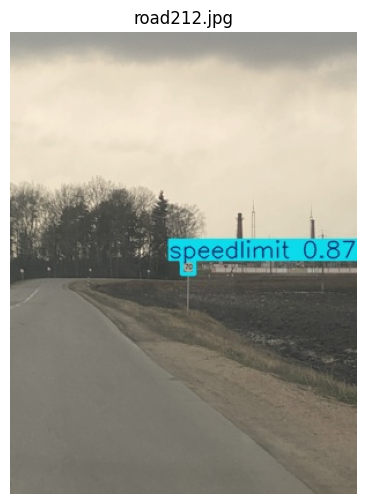

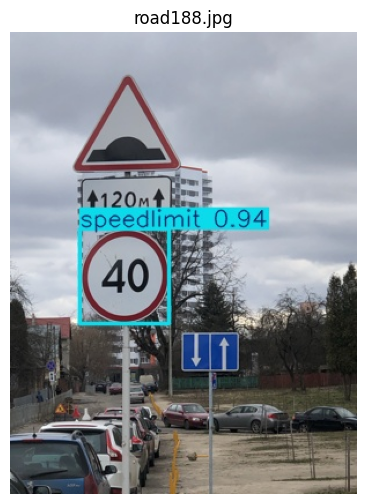

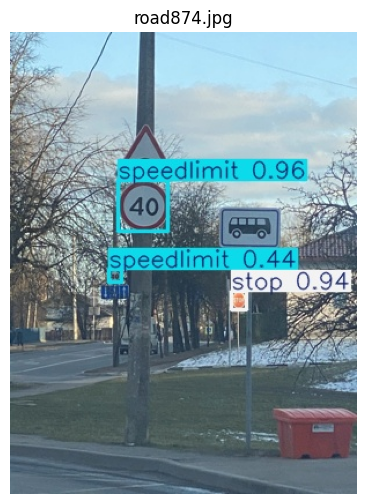

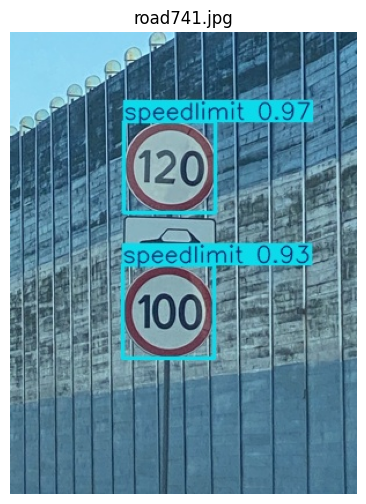

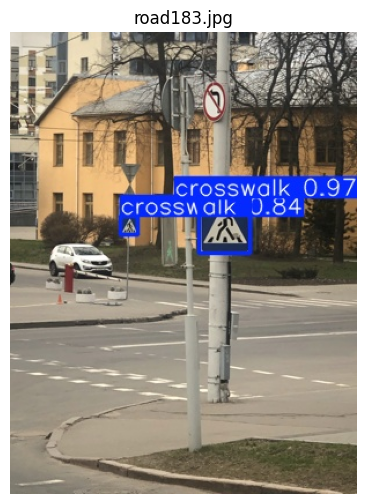

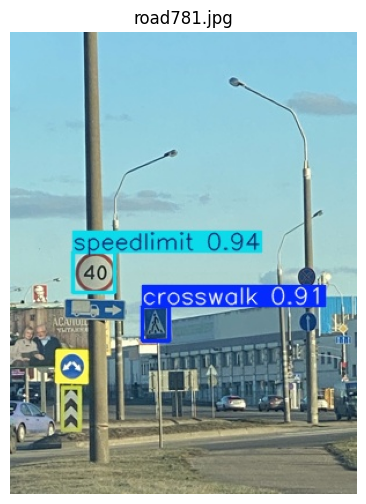

In [17]:
import random
import os
import cv2
from matplotlib import pyplot as plt

# Path to predicted images
pred_dir = 'runs/detect/predict'
pred_images = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.jpg', '.png'))]

# Randomly pick 6 images
sample_images = random.sample(pred_images, min(6, len(pred_images)))

# Show each image in a separate output
for img_name in sample_images:
    img_path = os.path.join(pred_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
    plt.show()


# Evaluating on Test Set

In [20]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/detect/yolov8-road-signs4/weights/best.pt')

# Run evaluation on test set
metrics = model.val(data='road_signs.yaml', split='test', imgsz=640, device=0)

# Display metrics
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")


Ultralytics 8.3.167  Python-3.12.4 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2252.1675.5 MB/s, size: 246.5 KB)


val: Scanning C:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\Dataset\test\labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]


                   all         89        134      0.943      0.859      0.903      0.765
             crosswalk         23         25      0.908       0.88      0.898      0.696
            speedlimit         69         82      0.999          1      0.995      0.924
                  stop          9          9      0.881          1      0.995      0.925
          trafficlight         10         18      0.985      0.556      0.723      0.514
Speed: 0.7ms preprocess, 3.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to c:\Users\LAB.LAB12-PC42\Desktop\Road-Sign-Detection\runs\detect\val7
mAP50: 0.9029
mAP50-95: 0.7649
Precision: 0.9432
Recall: 0.8589
